# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [3]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [4]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [5]:
num_train_images = len(train_images)
print("Number of images in training set:", num_train_images)

num_test_images_1 = len(test_images_1)
print("Number of images in testing set 1:", num_test_images_1)

num_test_images_2 = len(test_images_2)
print("Number of images in testing set 2:", num_test_images_2)


Number of images in training set: 2726
Number of images in testing set 1: 3147
Number of images in testing set 2: 3147


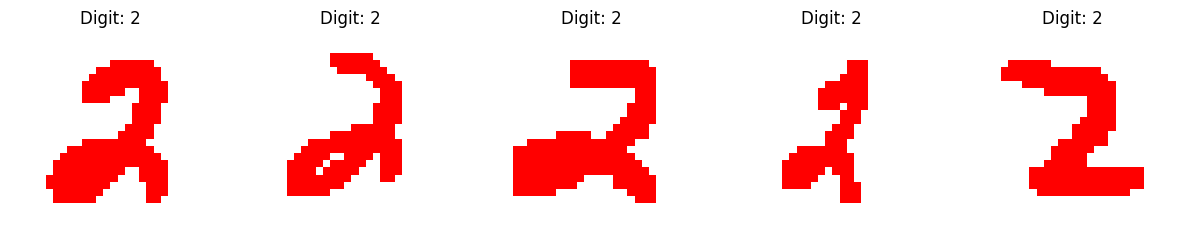

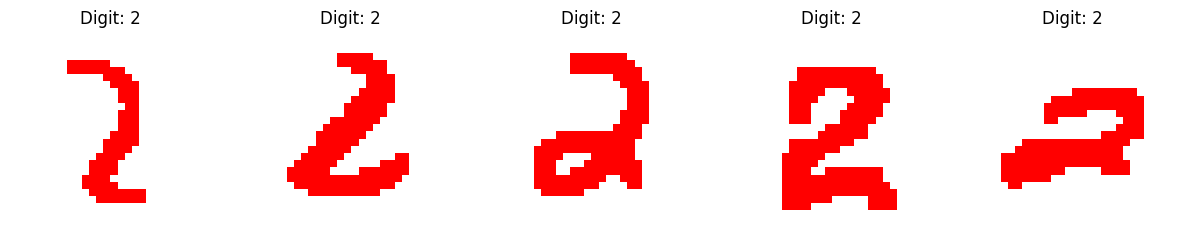

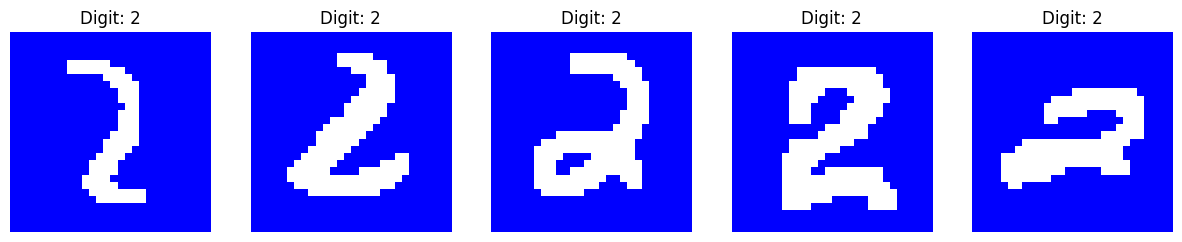

In [6]:


def visualize_digits(images, labels):
    num_images = min(5, len(images))  
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Digit: {labels[i]}", fontsize=12)
        plt.axis('off')
    plt.show()

visualize_digits(train_images, train_digits)

visualize_digits(test_images_1, test_digits_1)

visualize_digits(test_images_2, test_digits_2)


In [12]:
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened_1 = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_flattened_2 = test_images_2.reshape(test_images_2.shape[0], -1)


In [13]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10)
mlp_classifier.fit(train_images_flattened, train_digits)

/home/archp/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=10)

In [14]:
predictions_test1 = mlp_classifier.predict(test_images_flattened_1)
accuracy_test1 = accuracy_score(test_digits_1, predictions_test1)
print("Accuracy on test set 1:", accuracy_test1)

Accuracy on test set 1: 0.9996822370511599


In [15]:
predictions_test2 = mlp_classifier.predict(test_images_flattened_2)
accuracy_test2 = accuracy_score(test_digits_2, predictions_test2)
print("Accuracy on test set 2:", accuracy_test2)

Accuracy on test set 2: 0.0


### Observations:

In this context, the MLP have learned to rely heavily on color cues rather than the actual features of the digits. This is evident from the high accuracy on test set 1 (same color) and extremely poor accuracy on test set 2 (different color).This is what is known as "__shortcut learning__".

__Shortcut learning__ refers to the phenomenon where a model exploits superficial correlations or shortcuts in the data to achieve high performance without truly understanding the underlying relationships. 

This scenario highlights how color similarity or difference between the training and testing data can significantly affect the performance of machine learning models. In this case, since test set 1 has the same color distribution as the training set, the model performs exceptionally well. Conversely, test set 2, with different color characteristics, results in poor performance.

### Improvements:

## Coverting to Grayscale

In [10]:
import cv2

def convert_to_grayscale(images):
    grayscale_images = []
    for image in images:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(grayscale_image)
    return grayscale_images
    
train_images_grayscale = convert_to_grayscale(train_images)

test_images_1_grayscale = convert_to_grayscale(test_images_1)

test_images_2_grayscale = convert_to_grayscale(test_images_2)


In [11]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_images_grayscale = np.array(train_images_grayscale)
test_images_1_grayscale = np.array(test_images_1_grayscale)
test_images_2_grayscale = np.array(test_images_2_grayscale)

train_images_flattened = train_images_grayscale.reshape(len(train_images_grayscale), -1)
test_images_1_flattened = test_images_1_grayscale.reshape(len(test_images_1_grayscale), -1)
test_images_2_flattened = test_images_2_grayscale.reshape(len(test_images_2_grayscale), -1)

clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu',tol=1e-4, max_iter=500, random_state=42)

clf.fit(train_images_flattened, train_digits)

predictions_test_1 = clf.predict(test_images_1_flattened)
accuracy_test_1 = accuracy_score(test_digits_1, predictions_test_1)
print("Accuracy on Testing Set 1:", accuracy_test_1)

predictions_test_2 = clf.predict(test_images_2_flattened)
accuracy_test_2 = accuracy_score(test_digits_2, predictions_test_2)
print("Accuracy on Testing Set 2:", accuracy_test_2)


Accuracy on Testing Set 1: 0.9917381633301557
Accuracy on Testing Set 2: 0.16650778519224657


### Observations

Differences in Data Distribution: Even though both testing sets are preprocessed and converted to grayscale, they can still exhibit different distributions of digit images. If the characteristics of the digits in testing set 2 differ significantly from those in testing set 1, the model may struggle to generalize well to this new distribution.

Residual Color Information: Even in grayscale images, there may be residual color information or artifacts that influence the model's predictions. This could be due to variations in pixel intensity caused by different colors in the original images.

